# Python数据分析案例实战-电商零售
---

## 数据分析的基本过程

![数据分析的基本步骤](images/da_steps.jpg)

接下来结合实际的案例分析，对以上过程进行详细操作。本文分析的案例为一家全球超市4年（2011年-14年）的大型零售数据集，电商的本质也是零售，且该数据集数据非常详尽，非常适合用于分析。

数据集来源：superstore_data，总共51290条数据，24个字段

### 1、明确问题
明确问题是非常重要的，或者说提出问题，在实际的数据分析过程中，前期我们就需要和业务人员一起讨论明确他们的需求以及统一各个指标的计算公式。本文参考电商分析8类基本指标，并结合数据集特点，，也即电商基础的的“人、货、场”分析。

![明确/提出问题](images/da_step1.jpg)

为更好的了解整体运营情况及理解数据，后续将从整体运营(场)--产品(货)--客户价值(人)顺序来进行分析。

### 2、理解数据

1. 采集数据：本文数据来源于公开数据:data/superstore_data.csv

2. 导入数据

In [2]:
dir(warnings)

['WarningMessage',
 '_OptionError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_filter',
 '_defaultaction',
 '_filters_mutated',
 '_formatwarning_orig',
 '_formatwarnmsg',
 '_formatwarnmsg_impl',
 '_getaction',
 '_getcategory',
 '_is_internal_frame',
 '_next_external_frame',
 '_onceregistry',
 '_processoptions',
 '_setoption',
 '_showwarning_orig',
 '_showwarnmsg',
 '_showwarnmsg_impl',
 '_warn_unawaited_coroutine',
 'catch_warnings',
 'defaultaction',
 'filters',
 'filterwarnings',
 'formatwarning',
 'onceregistry',
 'resetwarnings',
 'showwarning',
 'simplefilter',
 'sys',
 'warn',
 'warn_explicit']

In [3]:
#导入pandas包
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

#读取数据
data=pd.read_excel('data/superstore_data.xlsx')

3. 查看数据集的信息，包括描述统计信息，从整体上理解数据

In [4]:
#查看数据集信息，打印前5行,总共有20列,只显示后8列
data.iloc[:,-8:-1].head()

,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.14,35.46
1,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72
2,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.64,8.17
3,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82
4,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.77,4.7


In [5]:
data['Order Date'].head()

0    1/1/2011
1    1/1/2011
2    1/1/2011
3    1/1/2011
4    1/1/2011
Name: Order Date, dtype: object

In [6]:
# 查看大小
data.shape

(51290, 20)

In [7]:
# 查看数据列的类型
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Segment            object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity          float64
Discount          float64
Profit             object
Shipping Cost      object
Order Priority     object
dtype: object

### 3、数据清洗

在数据分析的工作中，有多达60%的时间是花在了分析前数据的清洗上的。比如选择子集、列名重命名、数据类型转换、缺失数据处理、数据排序、异常值处理等，操作没有先后顺序，可根据实际数据集情况而选定。

#### 1）数据格式转换

因后面要进行时间序列分析，以Order Date为时间维度，但Order Date现在是object格式，故先对Order Date进行数据清洗，转换为时间格式，后面分析都要用到。

In [8]:
#20066行数据前后的日期格式不一样，故先拆分为2个dataframe：data1和data2
data1 = data.loc[0:20066,:]

data2 = data.loc[20067:51289,:]

#对data1中Order Date数据进行时间格式转换
data1.loc[:,'Order Date'] = pd.to_datetime(data.loc[:,'Order Date'],format='%Y/%m/%d',errors='coerce')
#对data2中Order Date数据进行时间格式转换
data2.loc[:,'Order Date'] = pd.to_datetime(data.loc[:,'Order Date'],format='%Y-%m-%d',errors='coerce')

#合并data1和data2为一张表
data=data1.append(data2)

In [57]:
data['Order Date'].head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: Order Date, dtype: datetime64[ns]

#### 2）排序，对data按Order_data进行升序排列

In [21]:
#对data进行按Order Date日期进行排序
data_new=data.sort_values(by='Order Date',ascending=True,na_position='first')

#截取Order Date中的年和月成为新的列，方面后续进行年度和月度销售分析
from datetime import datetime  #导入datetime模块
dt=data_new['Order Date'].astype(str) #转换成字符串格式

dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
data_new['month'] = dt.map(lambda x: x.month) #获取月份，并添加列month
data_new['year']=dt.map(lambda x:x.year) #获取年份，并添加列year

3）选择子集

以选择场（整体运营--销售分析）子集数据为例。

In [55]:
#选取销售分析数据子集
sales_data=data_new[['Order Date','Sales','Profit','year','month']]
sales_data.head()   #打印前5行

,Order Date,Sales,Profit,year,month
0,2011-01-01,408.300,106.14,2011,1
1,2011-01-01,120.366,36.036,2011,1
2,2011-01-01,66.120,29.64,2011,1
3,2011-01-01,44.865,-26.055,2011,1
4,2011-01-01,113.670,37.77,2011,1


#### 4）缺失数据处理（此数据集没有缺失值）

In [26]:
#查看sales_data数据是否有空值，若有则显示所在行和列
sales_data[sales_data.isnull().values==True] 

,Order Date,Sales,Profit,year,month


#### 5）异常值处理

In [27]:
#查看sales_data基本描述统计信息，初步判断是否有异常值
sales_data.describe() 

,Sales,year,month
count,51290.000000,51290.000000,51290.000000
mean,243.968585,2012.777208,7.522636
std,486.939314,1.098931,3.300056
min,0.000000,2011.000000,1.000000
25%,29.600000,2012.000000,5.000000
50%,83.250000,2013.000000,8.000000
75%,248.280000,2014.000000,10.000000
max,22638.480000,2014.000000,12.000000


#### 6）列名重命名

### 4、构建模型

In [28]:
#导入matplotlib进行图表可视化展示
import matplotlib.pyplot as plt

#### 1）先进行整体运营情况分析(场)，了解运营现状，及对未来做出预测

![整体运营场分析](images/da_step4.jpg)

**首先计算年度&月度销售额&利润**

In [29]:
#第一步：将数据采用groupby根据year和month进行分组（这就是前面为什么要截取年份也月份的原因了）
gb=sales_data.groupby(['year','month'])
#第二步：将分组后的数据进行求和，得到不同年份不同月份的销售额
sales_year=gb.sum()
sales_year

Sales
year month              
2011 1       97053.84886
     2       91152.15698
     3      145654.84736
     4      113333.58470
     5      145905.90546
     6      212957.86022
     7      115510.41912
     8      205526.77382
     9      282590.05562
     10     198906.05204
     11     296300.92552
     12     331351.63464
2012 1      135696.00024
     2      100288.87898
     3      162626.39116
     4      158677.08008
     5      206202.15748
     6      254099.70642
     7      144103.66504
     8      301436.13038
     9      285928.98908
     10     250248.99420
     11     314293.16834
     12     337152.82660
2013 1      196754.62738
     2      159724.79824
     3      196556.64732
     4      175441.12940
     5      259253.09446
     6      389859.13410
     7      227305.61596
     8      325473.47736
     9      374800.40568
     10     291081.25480
     11     370837.44618
     12     403868.18754
2014 1      238156.48966
     2      183614.63556
     3      262913.47262
     4      238824.96930
     5      286189.24470
     6      399664.04310
     7      256974.72048
     8      455502.58636
     9      477343.08074
     10     412665.70816
     11     546036.74300
     12     497309.14664

因为是4年的数据，通常采用对每年&每月的销售额&利润做同比对比分析，需构建单独的进行销售额&利润分析的表格数据
> 构建单独的销售表

In [30]:
#第一步：对以上分组后的数据进行拆分，获得每年每月的销售额y销售额与利润表
year_2011=sales_year.loc[(2011,slice(None)),:].reset_index()
year_2012=sales_year.loc[(2012,slice(None)),:].reset_index()
year_2013=sales_year.loc[(2013,slice(None)),:].reset_index()
year_2014=sales_year.loc[(2014,slice(None)),:].reset_index()
year_2011   #给大家展示一下2011年的数据

,year,month,Sales
0,2011,1,97053.84886
1,2011,2,91152.15698
2,2011,3,145654.84736
3,2011,4,113333.58470
4,2011,5,145905.90546
5,2011,6,212957.86022
6,2011,7,115510.41912
7,2011,8,205526.77382
8,2011,9,282590.05562
9,2011,10,198906.05204


In [31]:
#第二步：构建销售表
sales=pd.concat([year_2011['Sales'],year_2012['Sales'],
                 year_2013['Sales'],year_2014['Sales']],axis=1)

# 6)数据清洗：对行名和列名进行重命名
sales.columns=['Sales-2011','Sales-2012','Sales-2013','Sales-2014']
sales.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#第三步：得到最终的销售额&利润数据表，并展示如下
sales

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,97053.84886,135696.00024,196754.62738,238156.48966
Feb,91152.15698,100288.87898,159724.79824,183614.63556
Mar,145654.84736,162626.39116,196556.64732,262913.47262
Apr,113333.58470,158677.08008,175441.12940,238824.96930
May,145905.90546,206202.15748,259253.09446,286189.24470
Jun,212957.86022,254099.70642,389859.13410,399664.04310
Jul,115510.41912,144103.66504,227305.61596,256974.72048
Aug,205526.77382,301436.13038,325473.47736,455502.58636
Sep,282590.05562,285928.98908,374800.40568,477343.08074
Oct,198906.05204,250248.99420,291081.25480,412665.70816


有了以上销售额数据表后便可开始进行销售分析

-----------------------

1. **计算2011-2014年年度总销售额及增长率**

,sales_sum,rise_rate
Sales-2011,2.236244e+06,0.000000
Sales-2012,2.650754e+06,0.185360
Sales-2013,3.370956e+06,0.271697
Sales-2014,4.255195e+06,0.262311


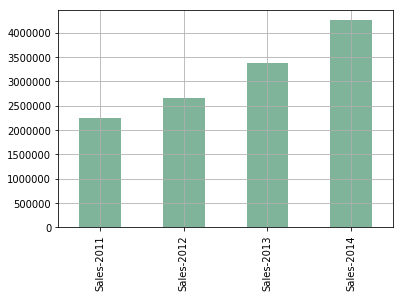

In [32]:
#计算年度销售额并图表展示
sales_sum=sales.sum()
sales_sum.plot(kind='bar',colormap = 'RdYlGn_r',alpha=0.5)
plt.grid()

#计算每年增长率
rise_12=sales_sum[1]/sales_sum[0]-1
rise_13=sales_sum[2]/sales_sum[1]-1
rise_14=sales_sum[3]/sales_sum[2]-1
rise_rate=[0,rise_12,rise_13,rise_14]

#表格显示增长率
sales_sum=pd.DataFrame({'sales_sum':sales_sum})
sales_sum['rise_rate']=rise_rate
sales_sum

**分析**：通过以上计算结果和图表展示可以发现，超市2011-2014年每年业绩呈现上升趋势，增长率也在提升，从2011年的226w到2014年的430w，说明经营在逐步稳定。

但是从销售额对比亚马逊/沃尔玛这种大型超市，还是有一定差距，可以继续努力；
从业绩增长率来看，对比沃尔玛公开数据显示（2012-2014年均增长率为4.5%），还是非常有竞争力的（但是沃尔玛的基数大，增长率会放缓，所以要结合销售额和增长率一起看）
结合年度销售额及增长率，再结合公司整体战略规划，可以预测或制定下一年度总销售额业绩指标

了解了超市整体销售额后，再对每年每月的销售额进行分析，了解不同月份的销售情况，找出是否有淡旺季之分，找出重点销售月份，以便制定经营策略与业绩月度及季度指标拆分

2. **计算2011-2014年每年月度总销售额及增长率**

> 先对每年每月销售额进行总体预览

In [35]:
#表格颜色设置，将数据从大到小按不同颜色做区分，颜色越深，销售额越高
sales.style.background_gradient(cmap='Greens',axis=0)

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,97053.8,135696,196755,238156
Feb,91152.2,100289,159725,183615
Mar,145655,162626,196557,262913
Apr,113334,158677,175441,238825
May,145906,206202,259253,286189
Jun,212958,254100,389859,399664
Jul,115510,144104,227306,256975
Aug,205527,301436,325473,455503
Sep,282590,285929,374800,477343
Oct,198906,250249,291081,412666


> 再对其进行图表展示

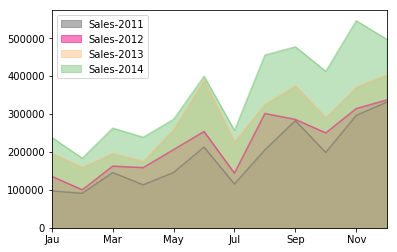

In [36]:
#面积堆叠图
sales.plot.area(colormap = 'Accent_r',stacked=False)

**分析**：从以上表格与图表显示可以大致看出，该超市的销售季节性还是挺明显的，总体上半年是淡季，下半年是旺季。上半年中总体6月份销售额是比较高的，下半年中7月份的销售额是偏低的。

- 对于旺季的月份，运营推广等策略要继续维持，还可以加大投入，提高整体销售额
- 对于淡季的月份，可以结合产品特点进行新产品拓展，举办一些促销活动等吸引客户


> 计算同比增长率

In [37]:
#计算每月同比增长率
rise=pd.DataFrame()
rise['rise_2012']=(sales['Sales-2012']-sales['Sales-2011'])/sales['Sales-2011']
rise['rise_2013']=(sales['Sales-2013']-sales['Sales-2012'])/sales['Sales-2012']
rise['rise_2014']=(sales['Sales-2014']-sales['Sales-2013'])/sales['Sales-2013']
rise

# 表格色阶显示
rise.style.background_gradient(cmap='Greens',axis =1,low=0,high=1)
# cmap：颜色; axis：0为行，1以列

,rise_2012,rise_2013,rise_2014
Jau,0.398152,0.449966,0.210424
Feb,0.100236,0.592647,0.149569
Mar,0.116519,0.208639,0.337596
Apr,0.400089,0.105649,0.361283
May,0.413254,0.257276,0.103899
Jun,0.193192,0.534276,0.0251499
Jul,0.247538,0.577376,0.130525
Aug,0.466651,0.0797428,0.399508
Sep,0.0118155,0.310816,0.273593
Oct,0.258127,0.163167,0.417699


**分析**：从表格显示，首先，几乎所有的月份同比前一年都是增长的。其次，结合表2年度销售额增长率来看，每年月度销售额增长率超过年度增长率的月份分布，基本没有什么规律；第三，同比增长率目前来看，没有太大规律，这给下一年拆分业绩指标其实增加了一定难度。

但是会发现基本每个月份都是有同比增长率很高的（12年的4、5、8月；13年的1、2、6、7、9月；14年的3、4、8、10、11、12），说明对于每个月的经营提高策略都有一定的把握了，后续经营会更加顺手。


对销售情况有了一定了解后，接下来看一下超市整体的利润及利润率情况，以便了解超市经营的健康状态，如果利润率过低，那就要结合公司整体发展，调整整体运营策略

> 同分析销售额一样，先构建单独的利润表

![表5：4年每年每月利润数据表](images/t4.jpg)

In [48]:
# （此处省略代码，和销售表同理）

3. **计算2011-2014年年度总利润及增长率**

![表5：4年每年每月利润数据表](images/t5.jpg)

![图3 ：2011-2014年度总销售额和总利润额对比](images/i3.jpg)

In [49]:
# 此处省略代码，和销售增长率表同理）

**分析**：通过图表可以看出，每年的利润和销售额一样，是在逐年增加的，说明企业经营还是比较妥善的，而且和表2年度销售额增长率对比来看，除了14年利润率同比下降及对比销售额增长率（26.25%）低之外，前两年均高出销售额增长率，可能14年促销让利比较多（后面分析促销给销售的影响时会检验）。

但是利润率总体平稳，稳定在11%-12%之间。
了解了整体利润及利润率之后，再来看一下每月的利润及利润率（以2011年为例）

4. **计算2011年每月度销售额、利润及利润率**

In [41]:
# your code here

![图4 ：2011年每月度销售额、利润及利润率](images/i4.jpg)

**分析**：以上是以2011年为例，通过查看2012-14年的数据同样可以发现，总体来说，利润和销售额是成正比的，销售额越高，利润自然也就越高，利润率目前来看没有很大的关联性，在总体维持在4%-14%之间。

5. **客单价、销量及趋势**

接下来再来看一下客单价，客单价从某种程度上反映了企业的消费群体的许多特点以及企业的销售类目的盈利状态是否健康。

客单价=总消费金额 / 总消费次数 客单价（per customer transaction）是指商场（超市）每一个顾客平均购买商品的金额，客单价也即是平均交易金额。总消费次数：同一天内，同一个人发生的所有消费算作一次消费

In [42]:
#2011年客单价
#从一开始处理过的data_new数据表中截取2011年的数据，并选择子集
#data_2011=data_new[data_new['year'].isin([listtype[0]])]
#price_2011=data_2011[['Order Date','Customer ID','Sales']]

#计算总消费次数
#price_2011_dr=price_2011.drop_duplicates(
#    subset=['Order Date', 'Customer ID'])

#总消费次数：有多少行
#根据列名（Order Date，Customer ID），如果这两个列值同时相同，只保留1条，将重复的数据删除
#total_vol_2011=price_2011_dr.shape[0]
#print('2011年总消费次数=',total_vol_2011)

#unit_price_2011=price_2011['Sales'].sum()/total_vol_2011
#print('2011年客单价=',unit_pricel_2011)

2012-2014年客单价计算同理，最后计算结果如下：

In [47]:
# 代码省略

![表7 ：2011-2014年每年客单价](images/t7.png)

![表8 ：2011-2014年不同月份的销量](images/t8.jpg)

分析：从表格可以看出，2011-2014年总体销量与销售额是成正比的，下半年销售整体高于上半年，同时销量同比上一年均再提高。2011-2014年的客单价总体浮动范围不是很大，2014年客单价同比下降了22.34%，与之前的分析相对应，应该是2014年促销活动导致。


6. **市场布局--全球不同分店market的销售额对比**

从最开始的数据集信息可以知道，这是一所全球超市，在全球7个地方有分店，那么再来看一下不同分店的销售额占比，以便对不同分店采取对应的经营策略。
![表9 ：market总销售额及总销售额占比](images/t9.jpg)

![图5 ：2011-2014年不同market销售额对比及同比情况](images/i5.jpg)

In [50]:
# （代码省略）

**分析**：从以上图表可以看出，每家market总体每年销售额均处于上升趋势，其中APAC(亚太地区)、EU(欧盟)、US(美国)、LATAM(拉丁美洲)的market占到了总销售额的85%，总体也与地区的经济发展相匹配。

其中加拿大Canada的销售额微乎其微，可以结合公司整体战略布局进行取舍。

7. **促销活动带来的销售额、利润**

最后再来看一下促销对于销售额及利润的影响，基于前面的分析，我们预估2014年销售额增长率及利润增长率略有下降，猜测和促销有很大的联系，这里来验证一下。

no discount表示没有打折，discount表示打折（打折力度大的小的均算）

![表10 ：每年打折与不打折所带来的利润](images/t10.jpg)

![图6 ：2014年总销售额、总利润、打折带来的销售额、打折带来的利润展示](images/t6.jpg)

In [46]:
# 代码省略

**分析**：打折活动确实能够有效带动整体销售额，从以上图表可以看出，14年打折损失的利润确实比前几年高，也验证了前面提到了14年利润增长率降低的原因猜想。从图展6展示也可以看到，12月份年底可能是冲业绩，打折力度非常大。

打折的好与坏要分多方面来看，一方面利润确实有损，但是也要看到打折带来的销售额的增加，以及通过打折活动为企业带来了新的客户等，这些就涉及到ROI投资回报率计算，由于篇幅有限，后续会出专题分析～

--------------------------

#### 2）销售商品分析(货)

对超市整体运营情况有一定了解后，再来看一下，了解整体产品结构，及高贡献产品

先了解一下不同产品各自的销售情况，根据对产品类别Category和子类别Sub-Category做groupby分组求和后得图表如下

8. **不同产品销售额及利润对比分析**

![图6 ：2014年总销售额、总利润、打折带来的销售额、打折带来的利润展示](images/i7.jpg)

In [45]:
# 代码省略

分析：从图表中可以很清晰的看到不同产品的销售额贡献对比，可以判断出furniture(家具)中Bookcases(书柜)、Chairs(椅子)、Tables(桌子)，Office supplies(办公用品)中Appliances(电器)、Storage(储藏箱)，Technology(电子技术产品)中Accessories(附件)、Copiers(复印机)、Machines(机器)、Phones(电话/手机)，是整体产品中销售比较好的。

从著名的帕累托二八法则分析也可以看出，这几款产品的总销售占比达到84%，应该是自家优势主营产品，后续经营中应继续保持，可以结合整体战略发展适当加大投入，逐渐形成自己的品牌。

同时，也可以发现，末尾占比16%的产品中，Binders(粘合剂)、Furnishings(家具)、Art(艺术品)、Paper(纸)、Supplies(供应品)、Envelopes(信封)、Fasteners(紧固件)、Labels(标签)均是办公用品中的小物件。可以参考“啤酒与尿布”的故事，与其他主营产品结合，连带销售。（也有可能现在的这些小产品主要就是靠连带销售来的销售额，由于篇幅有限，后续会专题对关联销售进行分析～）

但是值得关注的是，Tables(桌子)的利润是负，表明这个产品目前处于亏损状态，应该是促销让利太多。通过检查原数据，发现Tabels大部分都在打折，打折的销量高达76%。如果是在清库存，这个效果还是不错的，但如果不是，说明这个产品在市场推广上遇到了瓶颈，或者是遇到强竞争对手，需要结合实际业务进行分析，适当改善经营策略。

#### 3）了解一下客户结构，以及新老客户占比

最后再来分析一下客户～了解一下客户结构，以及新老客户占比

9. **不同类型客户占比**

![图8 ：不同类型客户销售额占比](images/i8.jpg)

![图9 ：2011-2014年不同类别客户销售额对比情况](images/i9.jpg)

In [44]:
# 代码省略

**分析**：从以上两个图表看出，超过一半以上的客户为普通消费者consumer，且每类客户每年均在保持增长趋势，客户结构还是非常不错的。其中corporate和home office维系的好一般属于稳定长期客户，还可以有增长空间（后续会单独对corporate和home office新老客户占比进行分析验证）

10. **新客户数、老客户数及新客户占比**

再来了解一下新老客户分布，可以对超市客户维系健康状态进行了解

> 计算方式1：只要在超市里消费过即算做是老客户，没有时间限制

In [51]:
# （代码省略）

![表11 ：2011-2014年新客户数量、总客户数量、新客户占比（计算方式1)](images/t11.jpg)

**分析**：总表中可以发现从11年到14年，每年的新客户数量均在减少，其中11年的数据没有参考性（因为没有以前的数据，所以都是新客户），其中新客户数量逐年降低也和我们新老客户的计算方式有关。

> 故换一种方式来定义一下新客户：只要一年内在超市没有消费过即算做是新客户，重新计算如下

In [52]:
#（代码省略）

![表12 ：2012-2014年新客户数量（计算方式2）](images/t12.jpg)

**分析**：按照方式2计算的新客户数量明显比方式1计算的数量高出不少（11年的数据没有参考性，就不放了）。但是这里计算周期是年，所以总体来说上半年新客户数量会比下半年数量要高，但是下半年新客户占比又会比上半年高，所以同一年内对不同月份进行新客户数量对比没有太大意义。

但可以进行同比对比分析，总体来说新客户数量是在逐年递减的，说明该企业老客户的维系不错，但新客获取率较低。如果能够在新客户获取上能够突破，会给企业带来很大的增长空间。

### 5、数据可视化及数据报告撰写
其实在分析的时候，可视化图表已经在融入进行了，当你进行一个指标分析时，需要借助图表更加直观的了解数据，并且印证自己的猜想，所以以上内容就是总体的分析思路和数据的可视化展现。

### 6、总结